# Prerequisites

In [1]:
import sys

sys.path.append("..")

In [2]:
%load_ext autoreload
%autoreload 2

import os

import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imsave
from tqdm.notebook import tqdm

from dataset3d import BNSet, BNSetMasks, get_dloader_mask
from perlin import generate_fractal_noise_3d, get_random_fractal_noise3d
from util3d import show_volume

In [3]:
data_dir = "../data/bugNIST_DATA"

# Unit test

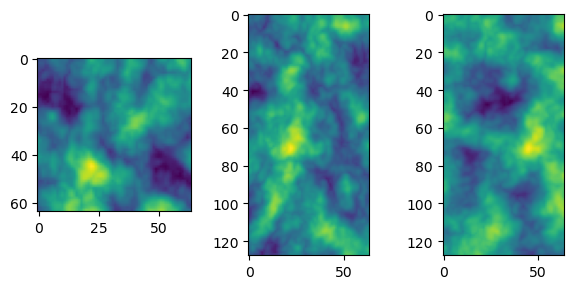

In [4]:
noise = generate_fractal_noise_3d((128, 64, 64), (4, 2, 2), 4)
noise = (noise - noise.min()) / (noise.max() - noise.min())
show_volume(noise)

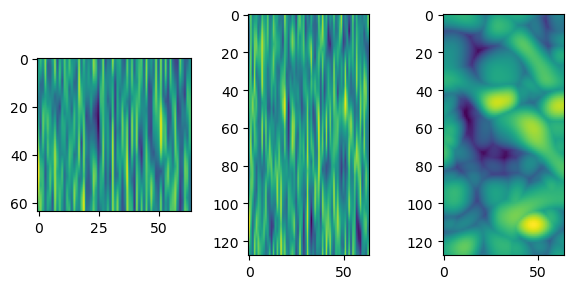

(0.0, 1.0)

In [5]:
noise = get_random_fractal_noise3d(128, 64, 64)
show_volume(noise)
noise.min(), noise.max()

In [6]:
# np.save(f'{data_dir}/3dnoisetest.npy', (noise * 255).astype(np.uint8))

# Generate noise

In [7]:
split_size = {'train': 2000}
for split in ('val', 'test'):
    dset = BNSet(data_dir, split)
    split_size[split] = len(dset)
split_size

{'train': 2000, 'val': 1098, 'test': 1099}

In [8]:
for split, size in split_size.items():
    split_noise = np.stack([(get_random_fractal_noise3d(128, 128, 128) * 255).round().astype(np.uint8) for i in tqdm(range(size))])
    np.save(f'{data_dir}/single_{split}_noise.npy', split_noise)
    del split_noise

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/1098 [00:01<?, ?it/s]

  0%|          | 0/1099 [00:00<?, ?it/s]

In [9]:
# split_noise = np.stack(split_noise)
# np.save(f'{data_dir}/single_{split}_noise.npy', split_noise)